# Lending Club Case Study 

##### Group Members: 
1. Rongali Simhachala Venkata Girish
2. ChandraMouli KrishnaMurthy

### Business Objectives:
To lend loans to borrowers with lower risk through a fast online interface.This has a challenge like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to **identify such risky loan applicants at the time of loan application** to reduce the amount of credit loss. The aim of this case study is to identify such applicants using EDA .

In other words, we need **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment in order to  minimise the risk of losing money while lending to customers.

### Problem Statement:

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Data

The **Loan Data** provided by the Lending Club consists of information in the time period **2007 to 2011**

**Data dictionary** describing the meaning of each variable is provided.

## Exploratory Data Analysis

Let's start with importing all the required libraries for the analysis and Ignore warnings due to version problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Let us increase the max number of columns and rows  displayed with pandas.

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

## DATA UNDERSTANDING, DATA  CLEANING AND MANIPULATION 

Let us read the Loan CSV file 

In [3]:
loans=pd.read_csv("loan.csv")
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Loan_copy will be used later to compare the data set before and after data cleaning.


In [4]:
loans_before_data_cleaning = pd.DataFrame(loans)

Data understanding - check for the shape and info of the loans dataset 

In [5]:
print(loans.shape)
print(loans.info())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


Data understanding - Check for duplicate rows in dataset based on id column

In [6]:
print("Total rows:",loans.duplicated(subset=None, keep='first').count())
duplicate_rows=loans[loans.duplicated(['id'])]
print("Total duplicate rows:",len(duplicate_rows))
duplicate_rows

Total rows: 39717
Total duplicate rows: 0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


**Observation**:
There are no duplicate rows.

Data understanding - Check the number of rows and columns that have only missing values

In [7]:
print('Number of empty Rows:',loans.isnull().all(axis=1).sum())
print('Number of empty Columns:',loans.isnull().all(axis=0).sum())

Number of empty Rows: 0
Number of empty Columns: 54


**Observation**:

There are no empty rows in the data set.

There are 54 empty columns in the data set.

Data manipulation - Finding percentage of null or missing values for each column

In [8]:
null_perc = round(100*(loans.isnull().sum()/len(loans.index)), 2)

Data understanding - Printing columns which have more than 0% missing values

In [9]:
null_perc[ null_perc > 0 ]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [10]:
print("Number of columns which has more than 50% null values = ", len(null_perc[null_perc>50]))

Number of columns which has more than 50% null values =  57


Data cleaning - For better analysis, these 57 columns with 50% null values will be removed.

In [11]:
loans.drop(null_perc[ null_perc > 50 ].index, axis=1, inplace=True)
loans.shape

(39717, 54)

Let us remove the columns that has only one unique value in all the cells as this will not add useful insights in our further analysis

Data understanding - Finding number of unique values in each column

In [12]:
loans.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

Variables: *tax_liens*,  *delinq_amnt*, *chargeoff_within_12_mths*, *acc_now_delinq*, *application_type*, *policy_code*, *collections_12_mths_ex_med*, *initial_list_status*, *pymnt_plan* .

Action: Drop them.

Reason:Have only one unique value in all the rows, which will not give any useful insights for us in our further analysis.

In [13]:
loan_cols_with_singleValues = loans.loc[:,loans.nunique().sort_values()==1]
loans.drop(loan_cols_with_singleValues.columns,axis=1, inplace=True)

In [14]:
loans.shape

(39717, 45)

Let us further analyse the remaining 45 columns for missing null values

In [15]:
missing = round(100*(loans.isnull().sum()/len(loans.id)), 2)
missing[missing != 0]

emp_title                6.19
emp_length               2.71
desc                    32.58
title                    0.03
revol_util               0.13
last_pymnt_d             0.18
last_credit_pull_d       0.01
pub_rec_bankruptcies     1.75
dtype: float64

Variable: desc

Description: Loan description provided by the borrower

let us remove the desc column as an equivalent information is provided by the data in the purpose and title columns.

In [16]:
loans.drop('desc',axis=1,inplace=True)

Variables:**url*,*member_id** 

Action: Remove them.

Reason: These not necessary for loan application details. We can drop them

In [17]:
loans.drop(['member_id', 'url'], axis=1, inplace=True)

Variables:**total_rec_int**, **total_rec_prncp**, **total_rec_late_fee**, **recoveries**,**collection_recovery_fee**,**last_credit_pull_d**,**last_pymnt_d**,**out_prncp**, **out_prncp_inv**

Action: Drop them

Reason: These variables are available post charged_off action. Recoveries, collection_recovery_fee columns are only valid for charged off loans. Hence will not be available during loan application.

In [18]:
loans.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_credit_pull_d','last_pymnt_d', 'out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

Data understanding - Finding the columns which have null values in their rows 

In [19]:
loans_null_rows=loans.isnull().sum()
loans_null_rows[loans_null_rows>0]

emp_title               2459
emp_length              1075
title                     11
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

Data cleaning - Removing the the null valued rows from the following columns.

In [20]:
loans.dropna(subset=['emp_length', 'revol_util', 'emp_title','title','pub_rec_bankruptcies'], inplace=True)

In [21]:
print(loans.shape)
loans.columns

(36493, 33)


Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

Let us use the data dictionary file to further narrow down the remaining **33** columns. 

The redundant columns out of 33 remaining columns are:
1. __id__
:<br>is a random number given to the loan, does not contribute to analysis.
2. __funded_amnt__
:<br> related insights can be infered from loan_amnt. 
3. __funded_amnt_inv__
:<br> related insights can be infered from loan_amnt.This wont be available at the time of decision making of funding a loan.
4. __zip_code__
:<br>first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis.
5. __revol_bal__
:<br>related insights can be obtained from revol_util. We can remove revol_bal.
6. __total_pymnt__
:<br>This wont be available at the time of decision making of funding a loan.
7. __total_pymnt_inv__
:<br>This wont be available at the time of decision making of funding a loan.
8. __last_pymnt_amnt__
:<br>This wont be available at the time of decision making of funding a loan.
9. __earliest_cr_line__
:<br>This wont be of significant importance for our analysis .
9. __emp_title__
:<br>The insights from this column can be covered with Purpose variable.
9. __title__
:<br>TThe insights from this column can be covered with Purpose variable.

Dropping the above redundant columns:

In [22]:
loans.drop(['funded_amnt','funded_amnt_inv', 'zip_code','revol_bal','total_pymnt','total_pymnt_inv','last_pymnt_amnt','earliest_cr_line','emp_title','title'],axis=1,inplace=True)

ID column will be useful as a primary Key for plotting graphs. So we are not dropping it.

In [23]:
loans.shape

(36493, 23)

Data understanding - check the data type of each column and change the format if required.

In [24]:
loans.dtypes

id                        int64
loan_amnt                 int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

***int_rate*** and ***revol_util*** are having '%' symbol values hence having data type of object. Let's remove % at the end and convert to float

In [25]:
loans.int_rate = loans.int_rate.str.strip('%').astype(float)
loans.revol_util = loans.revol_util.str.strip('%').astype(float)

Data manipulation -  Lets format employment length column(***emp_length***)to have only numbers. e.g convert 10+ years to 10

In [26]:
loans['emp_length']=loans.emp_length.str.extract('(\d+)').astype(int)

#### Date column 

We have to Set the format of issue_d column to %b-%y which will help in extracting year and month. 

In [27]:
loans.issue_d = pd.to_datetime(loans.issue_d, format='%b-%y')

#### Loan status column

Data understanding - Lets take a look on important variable loan status in total loans issued

In [28]:
(loans.loan_status.value_counts()*100)/len(loans)

Fully Paid     83.369413
Charged Off    13.709479
Current         2.921108
Name: loan_status, dtype: float64

**Observation**:

83.20 percent loans were fully paid.

13.89% loans were charged off.

We can remove the rows with loan status as *current* as they will not affect the analysis we wish to perform on loan application.

In [29]:
loans = loans[loans.loan_status != 'Current']

#### Data set shape before cleaning 

In [30]:
loans_before_data_cleaning.shape

(39717, 111)

#### Data set shape after cleaning:

In [31]:
loans.shape

(35427, 23)

#### SANITY CHECK

Sanity check - The Installment amount cannot be greater than Loan amount . 

In [32]:
loans[loans['installment']>loans['loan_amnt']].size

0

**Observation**:

There are no rows with Installment amount greater than loan amount. Hence the Data is Sane.

## DATA ANALYSIS

#### Derived columns - Derive year and month columns from issue_d column

In [33]:
loans['year']=loans['issue_d'].dt.year
loans['month']=loans['issue_d'].dt.month

In [34]:
loans.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'year',
       'month'],
      dtype='object')

#### Derived Columns - Derive bins of the following columns

categorise loan amounts into buckets which will help in further analysis

In [35]:
loans['loan_amnt_cats'] = pd.cut(loans['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

categorise Annual Income into buckets which will help in further analysis

In [36]:
loans['annual_inc_cats'] = pd.cut(loans['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])


categorise Interest Rate into buckets which will help in further analysis

In [37]:
loans['int_rate_cats'] = pd.cut(loans['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])


categorise dti into buckets which will help in further analysis

In [38]:
loans['dti_cats'] = pd.cut(loans['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

Deriving the loan amount to annual income ratio

In [39]:
loans['ratio'] = loans['loan_amnt'] * 10 / loans['annual_inc']
loans['ratio_bin'] = (loans['ratio'].astype(int)) * 10

Deriving the revolving utilisation bin

In [40]:
loans['revol_util_bin'] = round(loans['revol_util']/5)

### Key Driver Column: Loan Status

Our entire analysis of the data will revolve around Loan status . So let us perform univariate and segmented univariate analysis together  to get the important driver variables:

## *Univariate & Segmented Univariate Analysis* 

Let us Analyse the variables on the basis of their type . Various types are: 

1) Quantitative variables ---  loan_amnt,  annual_inc,  int_rate,installment, dti, delinq_2years,inq_last_6months, open_acc, pub_rec, revol_util, total_acc, pub_rec_bankruptcies.

2) Unordered variables --- purpose, term , home_ownership , verification_status,addr_state

3) Ordered Variables --- Issue date, grade , sub grade, emp_length

#### Utility functions

In [41]:
# This function removes the outliers for the speciefied feature in the dataset
# featureName - column or variable name for which the outliers need to be removed
# dataset - default - loans
# returns - dataset with the outliers removed
def removeOutliers(featureName,dataset=loans):
    #IQR calculation
    q1 = dataset[featureName].quantile(0.25)
    q3 = dataset[featureName].quantile(0.75)
    IQR = q3-q1
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    dataset= dataset[(dataset[featureName] < upper_bound) & (dataset[featureName] > lower_bound)]
    return dataset

In [42]:
# This function draws boxplots for specified features in the dataset
# featureName - Variable name for which you want to draw the plots
# x - Feature to be plotted on x-axis.
# y - Feature to be plotted on y-axis.
# xlabel - label for x-axis
# ylabel - lable for y-axis. Default = 'Number of Applicants'
# dataset - default - loans
# returns - None
def plot_boxplot(x,y,xlabel,ylabel,dataset=loans):    
    plt.figure(figsize=(12,8),facecolor='b')
    ax = sns.boxplot(y=y, x=x, data=dataset,palette='rainbow')
    plt.xticks(rotation=90)
    ax.set_title(xlabel +' vs ' + ylabel,fontsize=15,color='w')
    ax.set_ylabel(ylabel,fontsize=14,color = 'w')
    ax.set_xlabel(xlabel,fontsize=14,color = 'w')
    plt.show

In [43]:
# This function draws boxplots for specified features in the dataset
# featureName - Variable name for which you want to draw the plots
# x - Feature to be plotted on x-axis.
# y - Feature to be plotted on y-axis.
# xlabel - label for x-axis
# ylabel - lable for y-axis. Default = 'Number of Applicants'
# dataset - default - loans
# returns - None
def plot_boxplot_with_hue(x,y,xlabel,ylabel,hue,dataset=loans):    
    plt.figure(figsize=(12,8),facecolor='b')
    ax = sns.boxplot(y=y, x=x,hue=hue, data=dataset,palette='rainbow')
    plt.xticks(rotation=90)
    ax.set_title(xlabel +' vs ' + ylabel,fontsize=15,color='w')
    ax.set_ylabel(ylabel,fontsize=14,color = 'w')
    ax.set_xlabel(xlabel,fontsize=14,color = 'w')
    plt.show

In [44]:
# This function draws barplots for specified features in the dataset
# featureName - Variable name for which you want to draw the plots
# x - Feature to be plotted on x-axis.
# y - Feature to be plotted on y-axis.
# xlabel - label for x-axis
# ylabel - lable for y-axis. Default = 'Number of Applicants'
# dataset - default - loans
# returns - None
def plot_barplot_with_hue(x,y,xlabel,ylabel,hue,dataset=loans):    
    plt.figure(figsize=(12,8),facecolor='b')
    x=sorted(dataset[x])
    ax = sns.barplot(y=y, x=x,hue=hue, data=dataset,palette='rainbow')
    plt.xticks(rotation=90)
    ax.set_title(xlabel +' vs ' + ylabel,fontsize=15,color='w')
    ax.set_ylabel(ylabel,fontsize=14,color = 'w')
    ax.set_xlabel(xlabel,fontsize=14,color = 'w')
    plt.show

In [45]:
# This function plots distribution and box plots as subplots for specified feature in the dataset
# featureName - Variable name for which you want to draw the plots
# returns - None

def plot_Distribution_BoxPlot(featureName,xlabel,dataset=loans):
    dataset = removeOutliers(featureName)
    print(dataset[featureName].describe())
    plt.figure(figsize=(15,8),facecolor='c')
    sns.set_style("dark")
    # subplot 1
    plt.subplot(2, 2, 1)
    ax = sns.distplot(dataset[featureName],rug = True)
    ax.set_title(xlabel + ' - Distribution Plot',fontsize=16,color='w')
    ax.set_xlabel(xlabel,fontsize=14,color='w')
    ax.set_ylabel('Density',fontsize=14,color='w')
    # subplot 2
    plt.subplot(2, 2, 2)
    ax = sns.boxplot(y=dataset[featureName])
    ax.set_title(xlabel + ' - Box Plot',fontsize=16,color='w')
    ax.set_ylabel(xlabel,fontsize=14,color='w')
    plt.show()

In [46]:
# This function draws scatter plots for specified features in the dataset
# featureName - Variable name for which you want to draw the plots
# x - Feature to be plotted on x-axis.
# y - Feature to be plotted on y-axis.
# xlabel - label for x-axis
# ylabel - lable for y-axis. Default = 'Number of Applicants'
# dataset - default - loans
# returns - None
def plot_scatterplot(x,y,xlabel,ylabel,dataset=loans):
    x = dataset[x]
    y = dataset[y]
    plt.figure(figsize=(15,4))
    sns.scatterplot(x, y,hue=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [47]:
# This function plots the count plot for the speciefied feature in the dataset
# featureName - column or variable name for which the outliers need to be removed
# xlabel - label for x-axis
# ylabel - lable for y-axis. Default = 'Number of Applicants'
# setfigsize - sets the figure size for the plot. Default - (15,8)
# dataset - default - loans
# returns - None
def countPlot(featureName,xlabel,ylabel="Number of Applicants",setfigsize=(15,8),dataset=loans):
    sns.set_style("dark")
    plt.figure(figsize=setfigsize,facecolor='c')
    cp = sns.countplot(data = dataset,x=featureName,order=dataset[featureName].value_counts(ascending=True).index)
    cp.set_title(xlabel + " v/s " + ylabel)
    cp.set_xlabel(xlabel,fontsize=14,color='w')
    cp.set_ylabel(ylabel,fontsize=14,color='w')
    plt.xticks(rotation=90)
    s=dataset[featureName].value_counts(ascending=True)
    for p in cp.patches:
        cp.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    plt.show()

In [48]:
# This function plots the bar plot for specified feature against the charged off proportion in the dataset
# featureName - column or variable name for which the outliers need to be removed
# xlabel - label for x axis
# setfigsize - sets the figure size for the plot. Default - (15,8)
# dataset - default - loans
# returns - None
def plot_Charged_off_proportion(featureName,xlabel,setfigsize=(15,8),dataset=loans,rotation=0):
    fig, ax = plt.subplots(figsize=setfigsize,facecolor='c')
    df = dataset.groupby([featureName, 'loan_status'], as_index=False)['id'].count()
    df['Proportion- Charged Off'] = df.groupby(featureName).transform(lambda x: x/x.sum())
    #plt.figure(figsize=setfigsize)
    #plt.color = list('rgbkymc')
    plt.xticks(rotation=rotation)
    ax = sns.barplot(x=featureName, y='Proportion- Charged Off',data=df.loc[df["loan_status"]=='Charged Off'])
    ax.set_xlabel(xlabel,fontsize=14,color='w')
    ax.set_ylabel('Proportion- Charged Off',fontsize=14,color='w')
    ax.set_title(xlabel + ' vs Defaulters Proportion ',fontsize=15,color = 'w')
    plt.show()

In [49]:
def plot_loanstatus_Distplot_BoxPlot(featureName,xlabel,dataset=loans):
    dataset = removeOutliers(featureName)
    print(dataset[featureName].describe())
    plt.figure(figsize=(15,8),facecolor='c')
    sns.set_style("dark")
    # subplot 1
    plt.subplot(2, 2, 1)
    ax = sns.distplot(dataset[featureName],rug = True)
    ax.set_title(xlabel + ' - Distribution Plot',fontsize=16,color='w')
    ax.set_xlabel(xlabel,fontsize=14,color='w')
    ax.set_ylabel('Density',fontsize=14,color='w')
    # subplot 2
    plt.subplot(2, 2, 2)
    ax=sns.boxplot(x=dataset[featureName], y=dataset['loan_status'], data=dataset,palette="Paired")
    ax.set_title(xlabel + ' - Box Plot',fontsize=16,color='w')
    ax.set_ylabel(xlabel,fontsize=14,color='w')
    plt.show()

### Quantitative Variables:

### Feature: Loan Amount

count    34417.000000
mean     10487.368161
std       6377.462773
min        500.000000
25%       5275.000000
50%       9600.000000
75%      15000.000000
max      29175.000000
Name: loan_amnt, dtype: float64


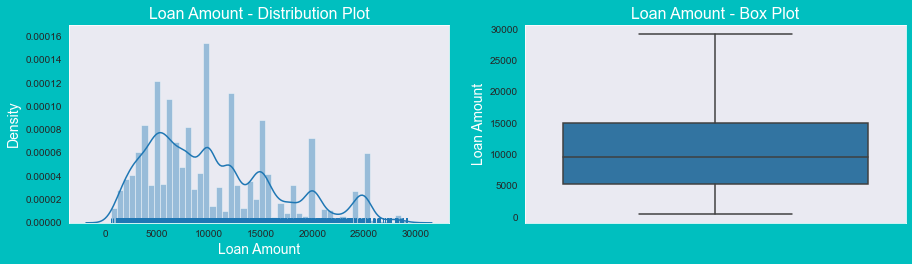

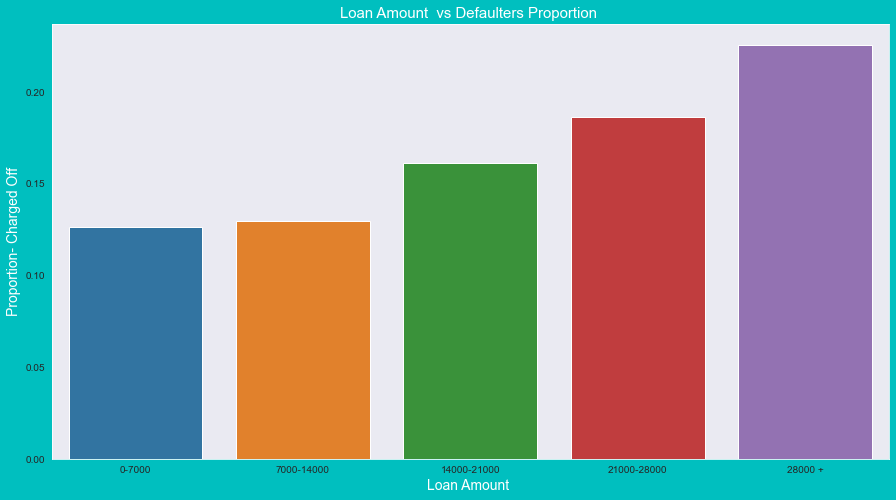

In [50]:
plot_Distribution_BoxPlot(featureName='loan_amnt',xlabel='Loan Amount')
plot_Charged_off_proportion('loan_amnt_cats',xlabel='Loan Amount ',setfigsize=(15,8),dataset=loans,rotation=0)

**Observation:**
-  Most of loan amounts taken are in the range of 5275 to 15000 
-  Median is 9600 and the max amount is 29175. 
-  Charged off loans increases as loan amount bucket increases.

### Feature: Annual Income

count     33780.000000
mean      61627.842009
std       27674.958043
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      143500.000000
Name: annual_inc, dtype: float64


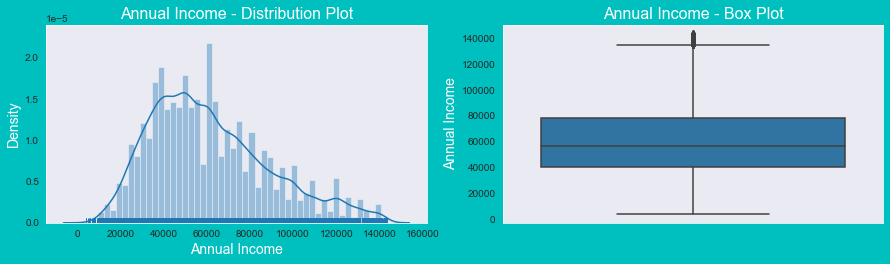

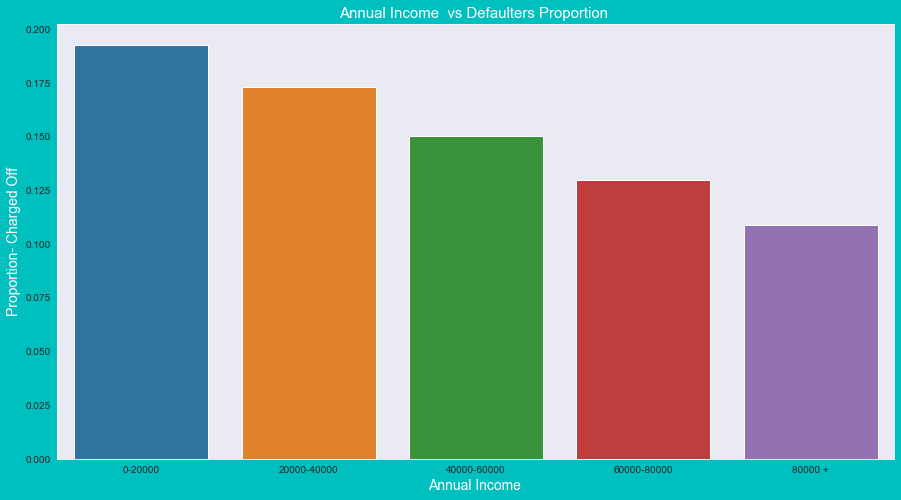

In [51]:
plot_Distribution_BoxPlot(featureName='annual_inc',xlabel='Annual Income')
plot_Charged_off_proportion('annual_inc_cats',xlabel='Annual Income ')

**Observation:**
-  Most of Annual Incomes are in the range of 40000 to 78000 
-  Median is 57000 and the max amount is 143500. 
-  Income range 80000+  has less chances of charged off.
-  Income range 0-20000 has high chances of charged off.
-  Notice that with increase in annual income charged off proportion got decreased.

### Feature: Interest Rate

count    35379.000000
mean        11.971279
std          3.681170
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         22.740000
Name: int_rate, dtype: float64


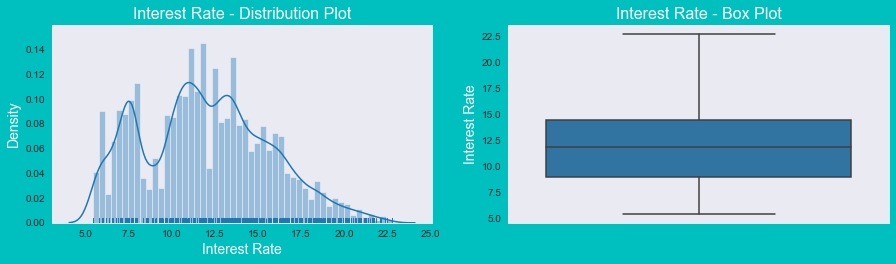

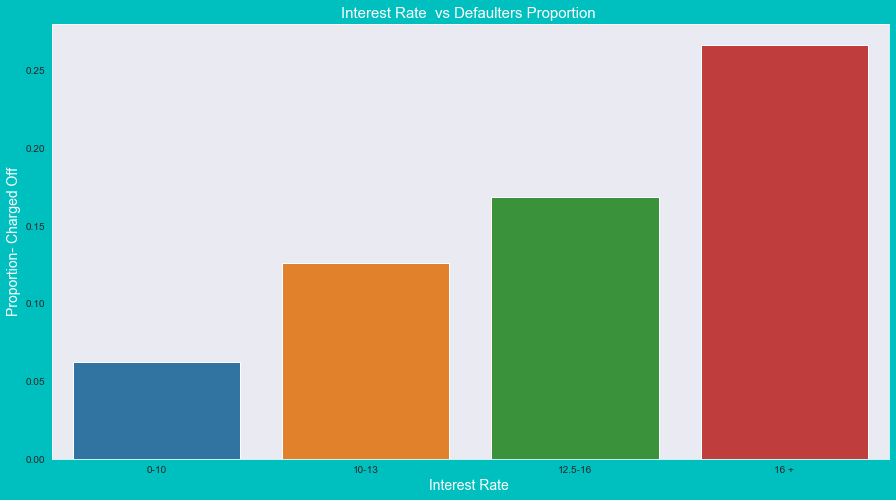

In [52]:
plot_Distribution_BoxPlot(featureName='int_rate',xlabel='Interest Rate')
plot_Charged_off_proportion('int_rate_cats',xlabel='Interest Rate ')

**Observation:**
-  Most of interest rateare in the range of 8.9% to 14.4% 
-  Median is 11.83% and the max interest rate is 22.4%. 
-  Interest rate less than 10% has very less chances of getting charged off. Interest rates are starting from min 5.42%.
-  Interest rate more than 16% has higher chances of getting charged off as compared to other category interest rates.
-  Charged off proportion is increasing with higher interest rates.

### Feature: Installment

count    34177.000000
mean       302.236856
std        175.218370
min         16.080000
25%        164.860000
50%        271.910000
75%        403.370000
max        814.340000
Name: installment, dtype: float64


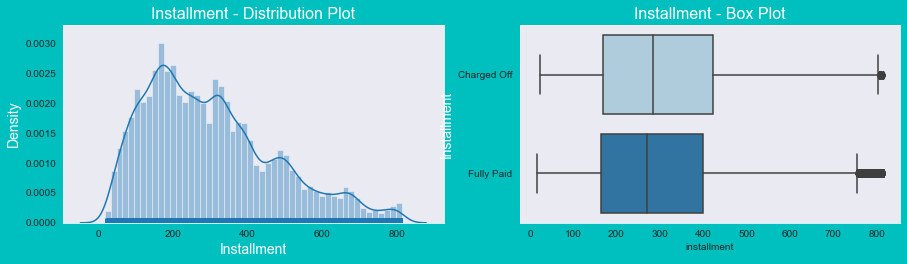

In [53]:
 plot_loanstatus_Distplot_BoxPlot(featureName='installment',xlabel='Installment')

**Observation:**
- The installment range is mostly between 164 to 403 with a median of 471.
- From the plot even though it appears that Installment for charged off is high for higher installments but it is not significant for our further analysis.    

### Feature: dti

count    35427.000000
mean        13.402182
std          6.636947
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64


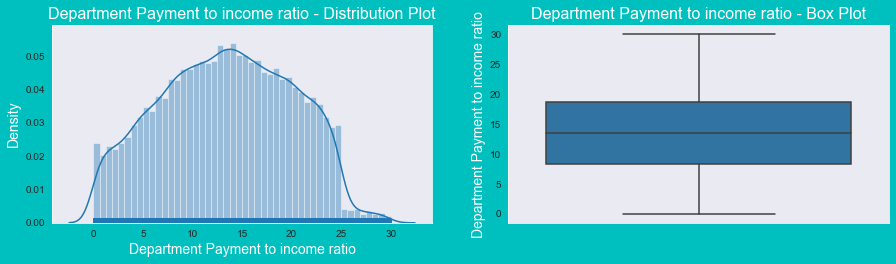

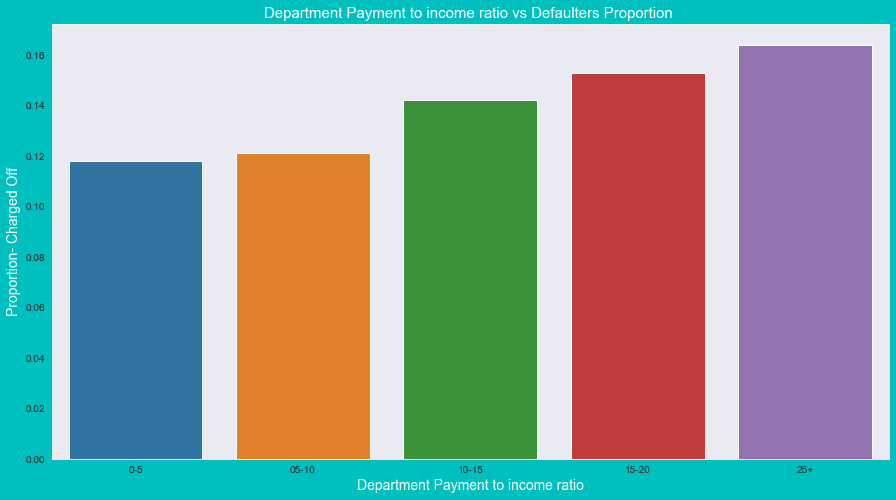

In [54]:
plot_Distribution_BoxPlot(featureName='dti',xlabel='Department Payment to income ratio')
plot_Charged_off_proportion('dti_cats',xlabel='Department Payment to income ratio',setfigsize=(15,8),dataset=loans,rotation=0)

**Observation:**
- When the deptartment payment to income ratio is higher than 20, the percentage of charged off loans are higher.
- Higher the dti higher the chances of loan being Charged Off

### Feature: delinq_2years

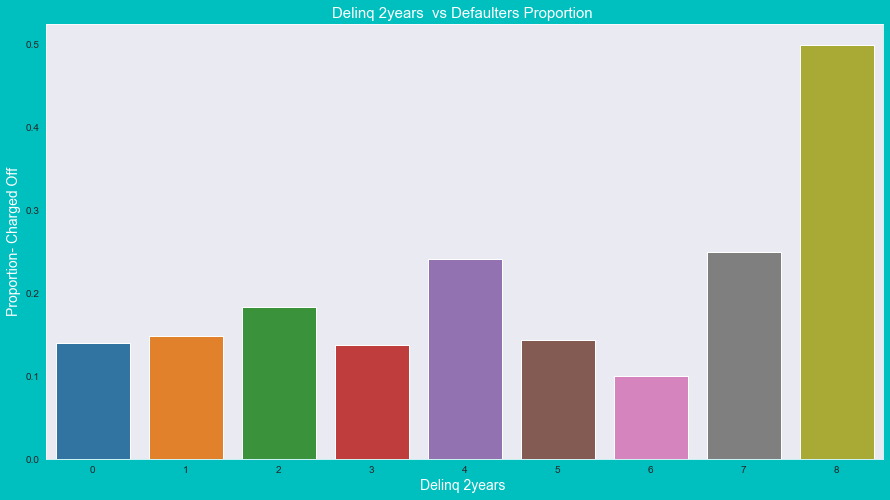

In [55]:
plot_Charged_off_proportion('delinq_2yrs',xlabel='Delinq 2years ',setfigsize=(15,8),dataset=loans,rotation=0)

**Observation:**
- Delinquency and Charged off are both loan terms representing different degrees of the same problem.  A loan becomes delinquent when payments are late even by one day.
- From the plots, it evident that higher the delinquency the applicant is very likely to default.

### Feature: open_acc

count    34763.000000
mean         9.059776
std          3.932898
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         20.000000
Name: open_acc, dtype: float64


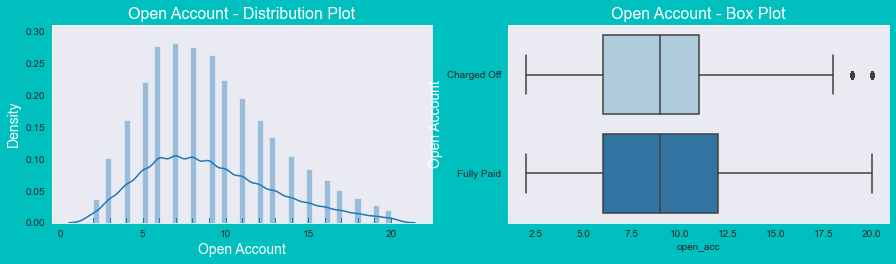

In [56]:
plot_loanstatus_Distplot_BoxPlot(featureName='open_acc',xlabel='Open Account')

**Observation:**
- From the plot looking at the median it suggest that most of the borrowers have 9 credit lines . 
- Looking at the median of the bar plot there is no significant difference between charged off and fully paid.

### Feature: inq_last_6months

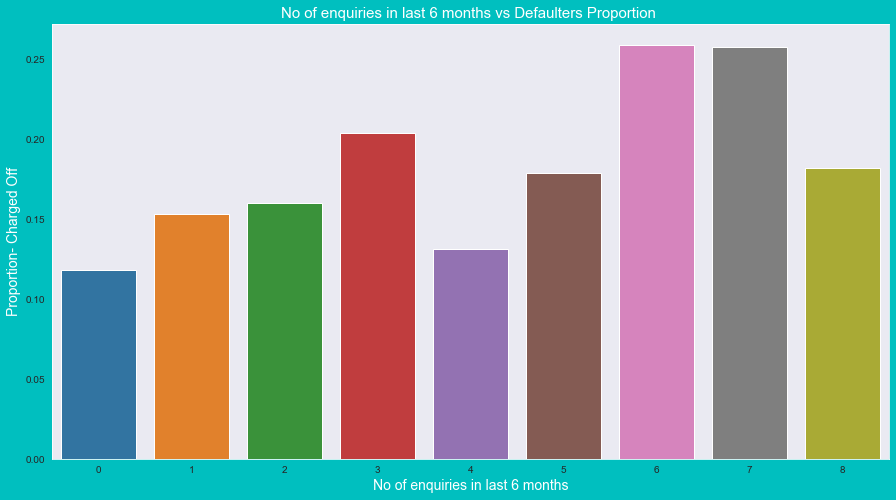

In [57]:
plot_Charged_off_proportion('inq_last_6mths',xlabel='No of enquiries in last 6 months')

**Observation:**
- From the plot even though it appears that more enquiries indicates higher default ,however it shows that with 4 enquiries the default rate has dipped. Hence we cannot conclude anything on this variable and cannot be considered for further analysis.

### Feature: pub_rec

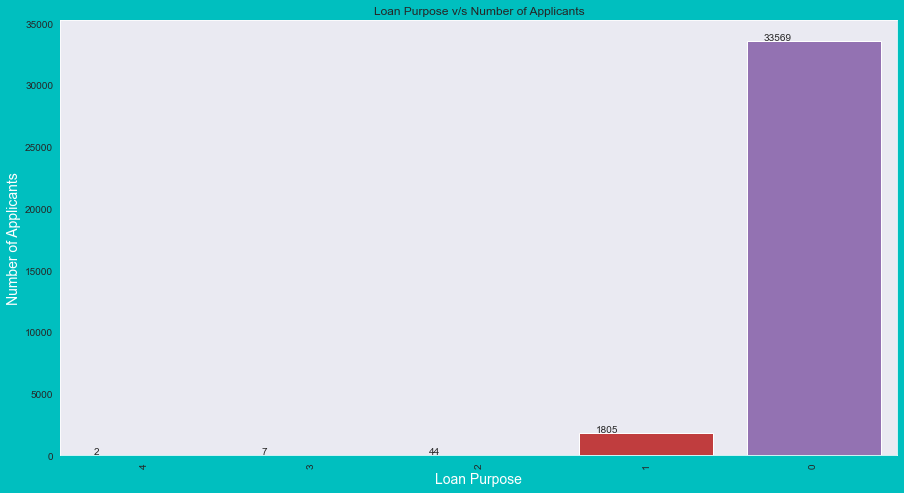

In [58]:
countPlot(dataset=loans,featureName="pub_rec",xlabel="Loan Purpose",ylabel="Number of Applicants")

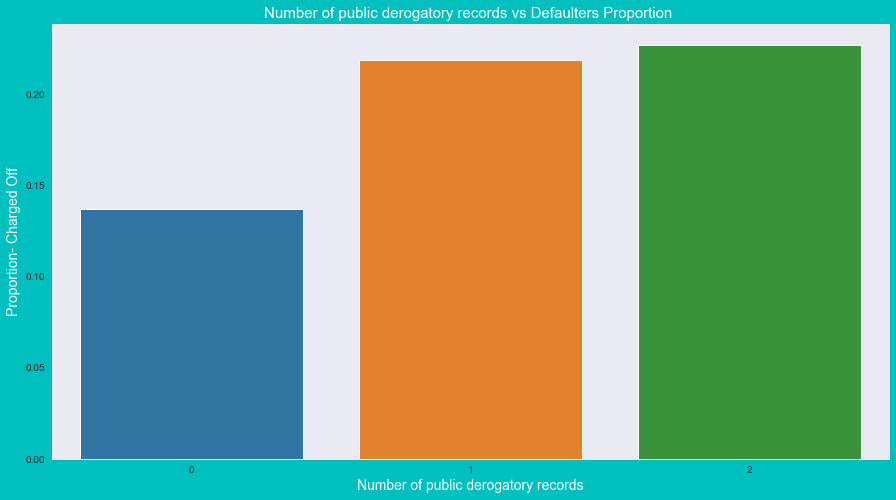

In [59]:
plot_Charged_off_proportion('pub_rec',xlabel='Number of public derogatory records')

**Observation:**
- Borrowers even with a single derogatory record have higher chances of Charged off.
- However as per the count plot most of the borrowers are with 0 records.Hence this variable can be ignored for further analysis .

### Feature: revol_util

count    35427.000000
mean        49.140047
std         28.227621
min          0.000000
25%         25.900000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64


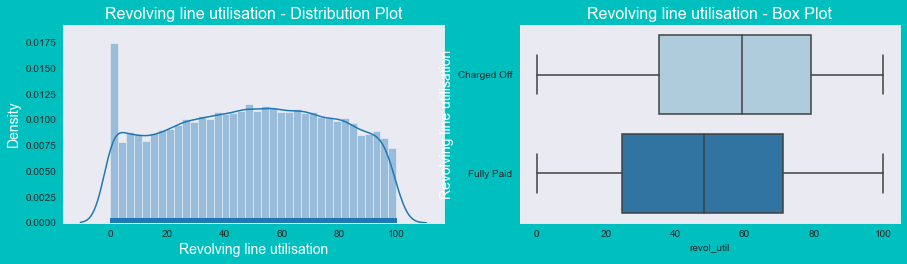

In [60]:
plot_loanstatus_Distplot_BoxPlot(featureName='revol_util',xlabel='Revolving line utilisation')

**Observation:**
- The average utilization rate is around 49%
- Average Revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans.

### Feature:total_acc

count    34783.000000
mean        21.545841
std         10.417843
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         51.000000
Name: total_acc, dtype: float64


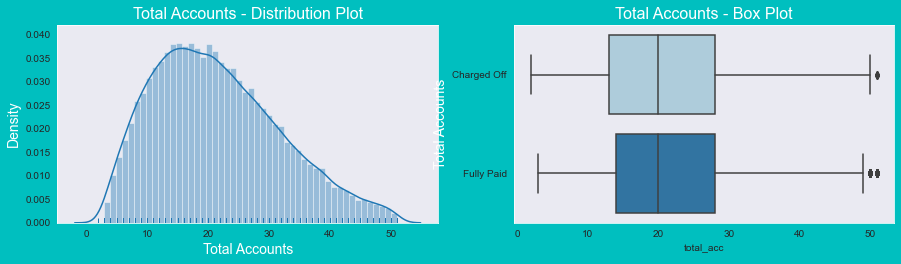

In [61]:
plot_loanstatus_Distplot_BoxPlot(featureName='total_acc',xlabel='Total Accounts')

**Observation:**
- The are around 21 average credit lines for the borrower's.
- There is no much difference between the Charged Off and Fully Paid credit lines. Hence we will not consider this variable for further analysis.

### Feature: pub_rec_bankruptcies

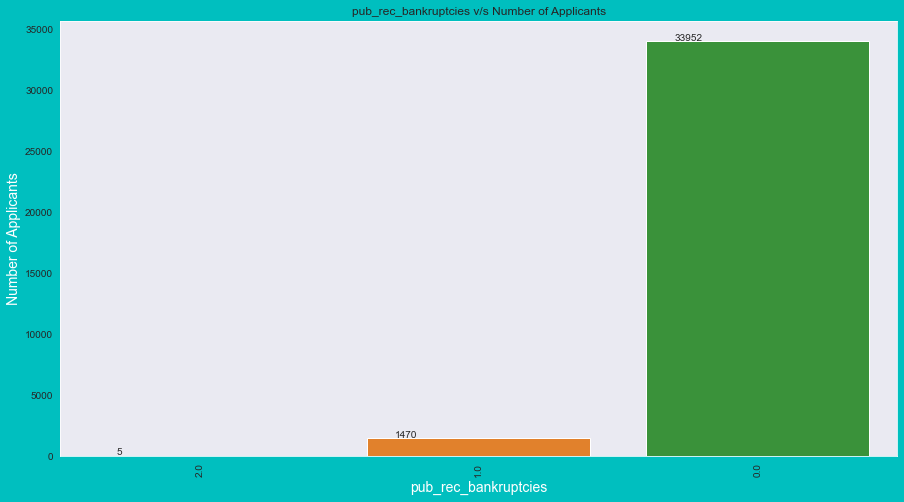

In [62]:
countPlot(dataset=loans,featureName="pub_rec_bankruptcies",xlabel="pub_rec_bankruptcies",ylabel="Number of Applicants")

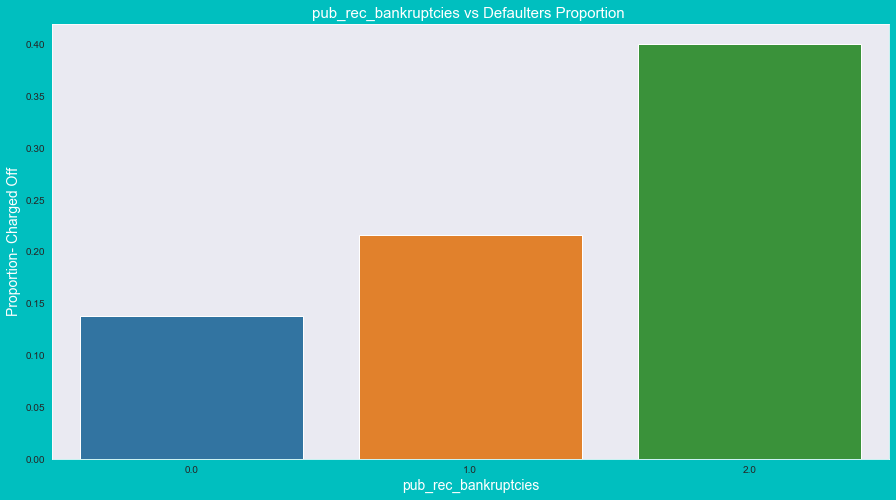

In [63]:
plot_Charged_off_proportion('pub_rec_bankruptcies',xlabel='pub_rec_bankruptcies')

**Observation:**
- Borrowers even with a single public bankruptcy record have higher chances of Charged off.
- However as per the count plot most of the borrowers are with 0 records.Hence this variable can be ignored for further analysis .

### Unordered Variables:

### Feature:Purpose

In [64]:
# Lets take a look on important variable purpose of loan in total loans issued
loan_purpose_per = (loans.purpose.value_counts()*100)/len(loans)
loan_purpose_per

debt_consolidation    47.810992
credit_card           13.060660
other                  9.791967
home_improvement       7.387021
major_purchase         5.580489
car                    3.937675
small_business         3.833235
wedding                2.458577
medical                1.755723
moving                 1.476275
house                  0.937138
vacation               0.937138
educational            0.784712
renewable_energy       0.248398
Name: purpose, dtype: float64

**Observation:**
- Most of the loans taken for debt consolidation(47%) and Credit card bill payment(13%).

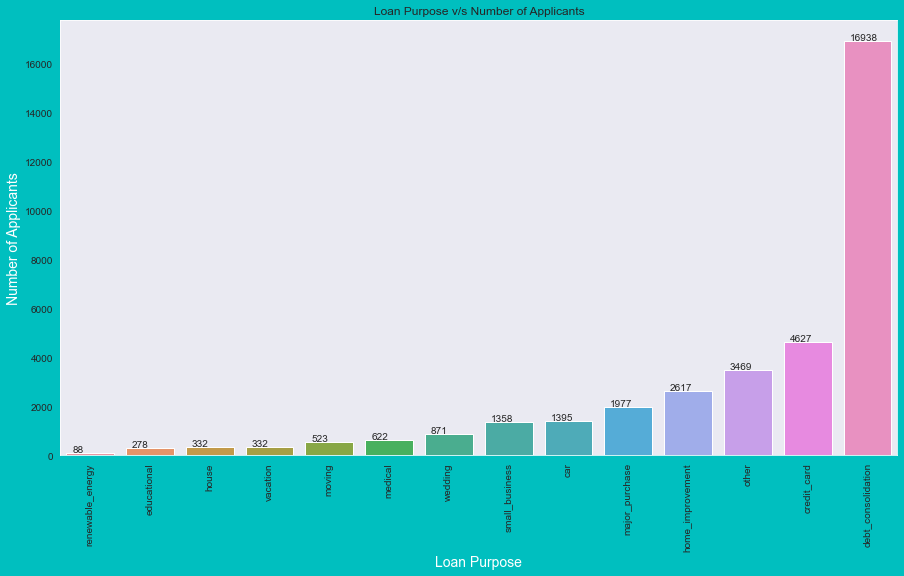

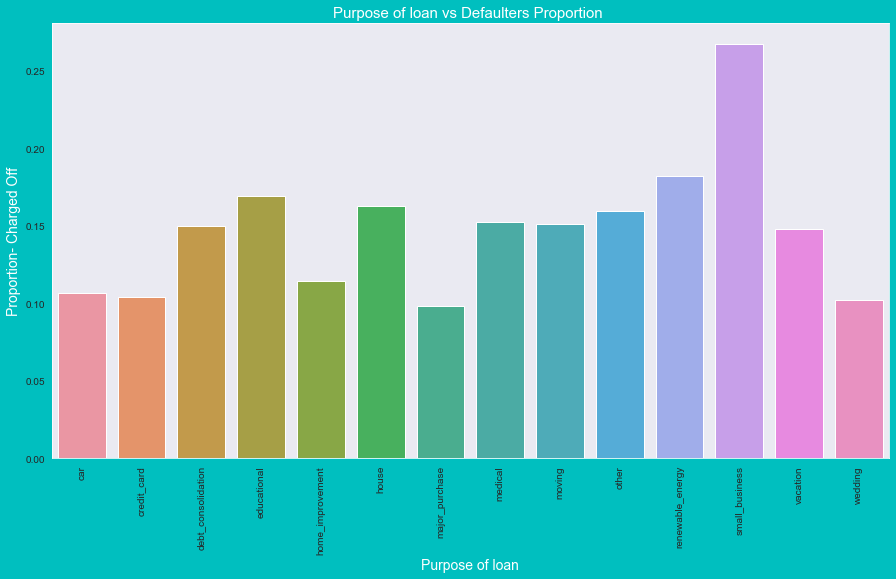

In [65]:
countPlot(dataset=loans,featureName="purpose",xlabel="Loan Purpose",ylabel="Number of Applicants")
plot_Charged_off_proportion('purpose',xlabel='Purpose of loan',rotation=90)

**Observation:**
- Debt consolidation is the largest purpose for borrowing a loan.
- Small Business is the riskiest of all purposes.

### Feature: Term

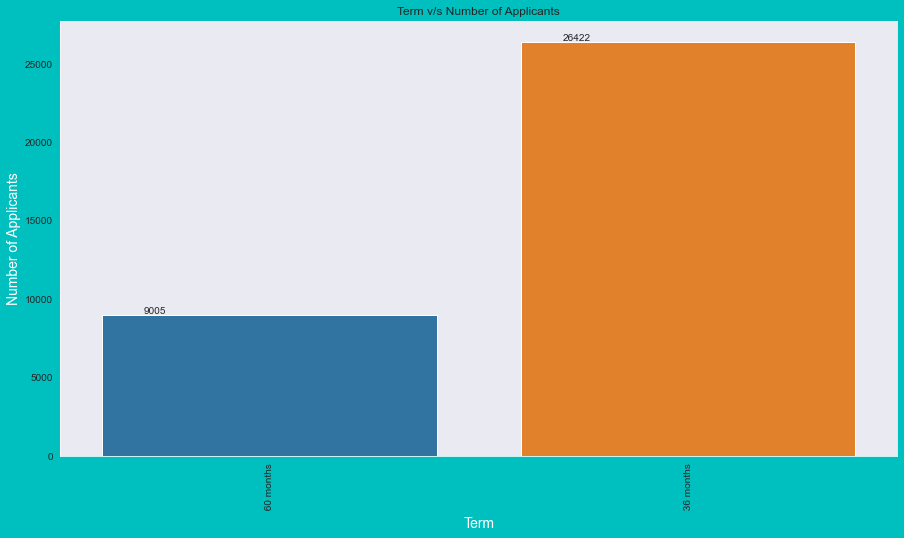

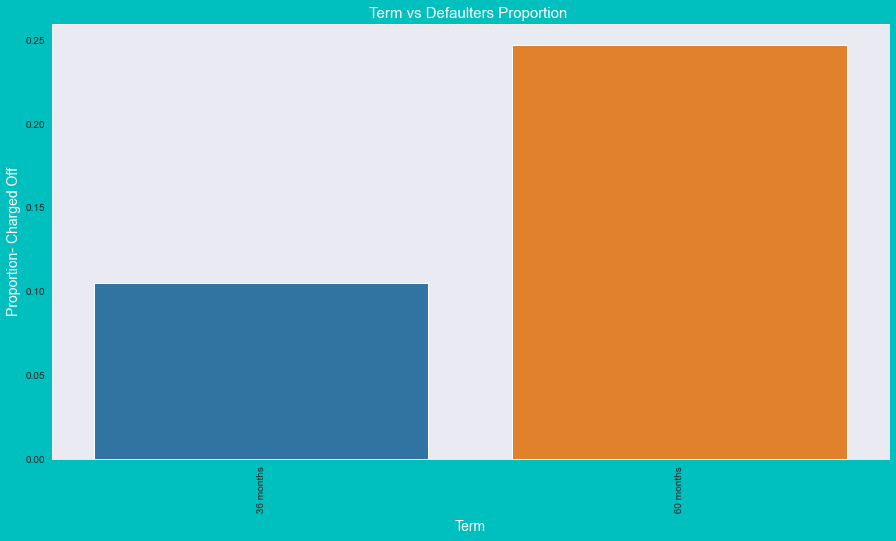

In [66]:
countPlot(dataset=loans,featureName="term",xlabel="Term",ylabel="Number of Applicants")
plot_Charged_off_proportion('term',xlabel='Term',rotation=90)

**Observation:**
- Most of the loans issued are of tenure 36 Months.
- Loans taken with longer tenure are likely to default.This needs further analysis.

### Feature: home_ownership

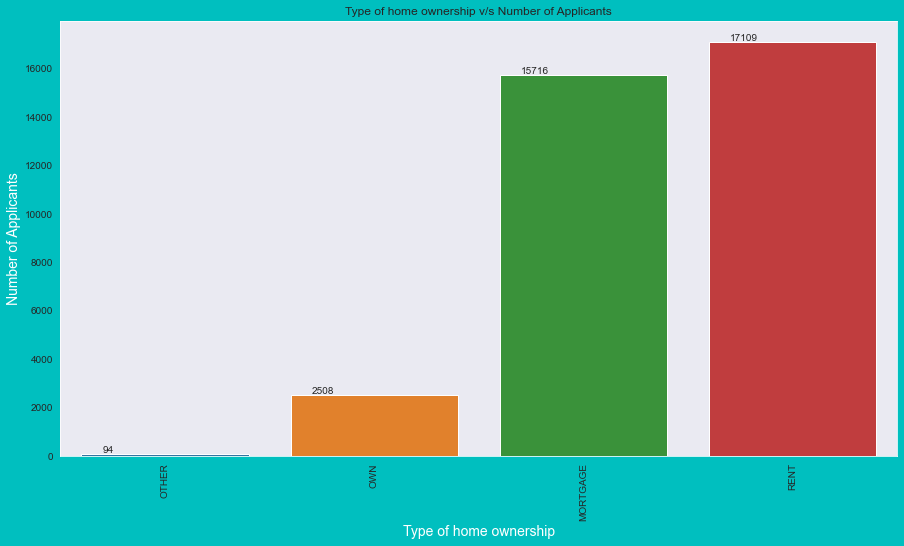

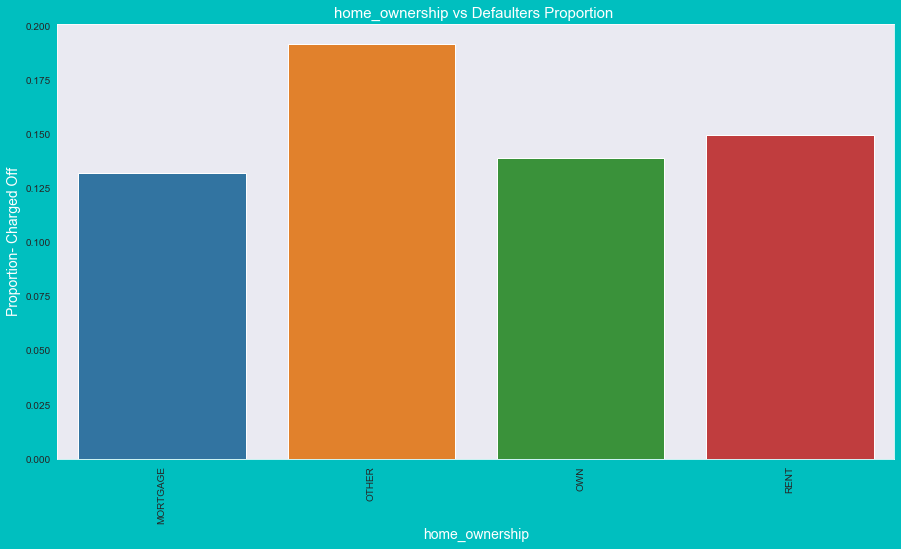

In [67]:
countPlot(dataset=loans,featureName="home_ownership",xlabel="Type of home ownership",ylabel="Number of Applicants")
plot_Charged_off_proportion('home_ownership',xlabel='home_ownership',rotation=90)

**Observation:**
- Most number of borrowers are rented.
- There is no significant impact of home ownership on Charged off.

### Feature: verification_status

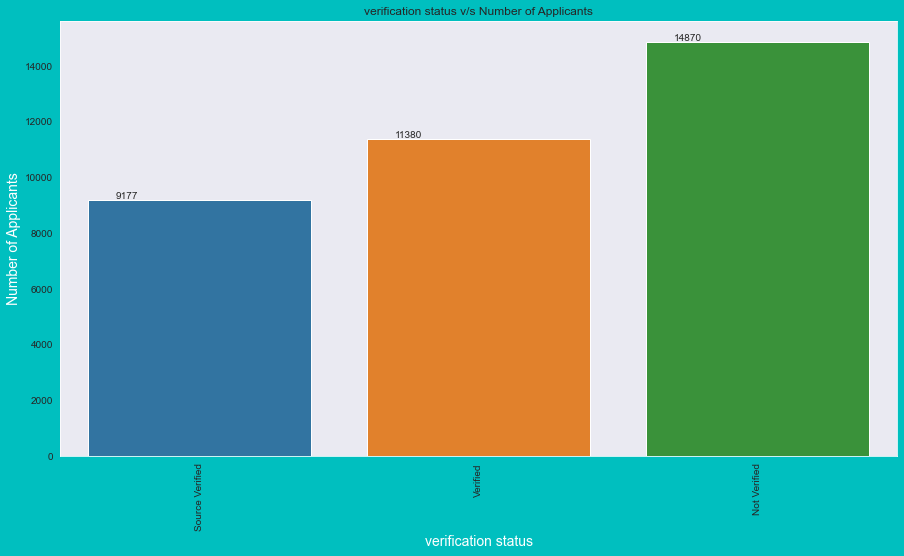

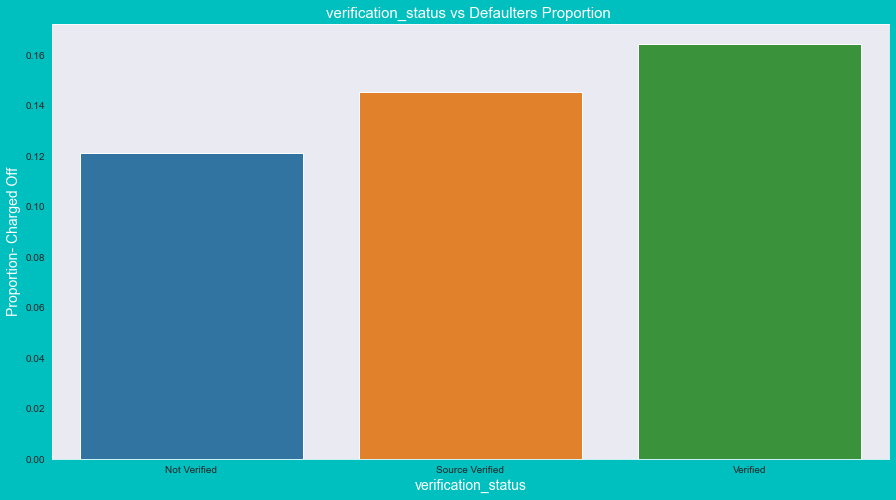

In [68]:
countPlot(dataset=loans,featureName="verification_status",xlabel="verification status",ylabel="Number of Applicants")
plot_Charged_off_proportion('verification_status',xlabel='verification_status')

**Observation:**
- Most number of borrowers are not verified.
- Ironically borrwers who are verified are shown to be most likely defaulted. This requires further analysis.

### Feature: addr_state:

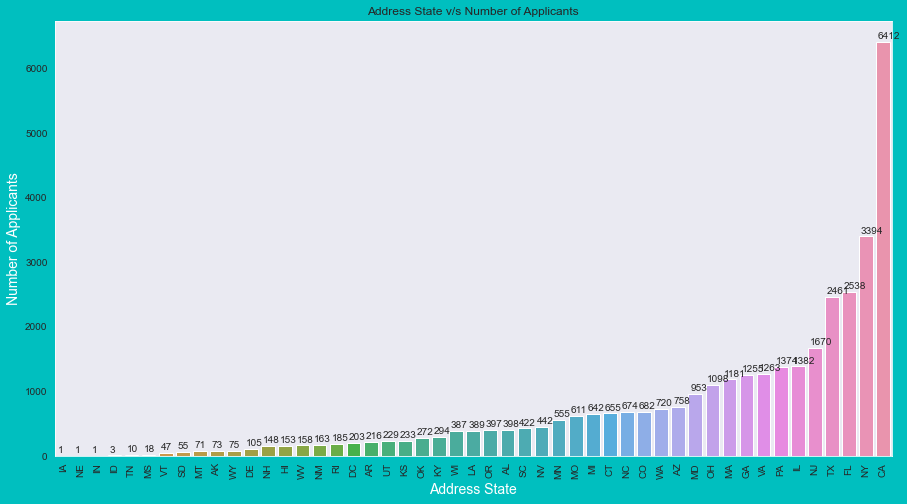

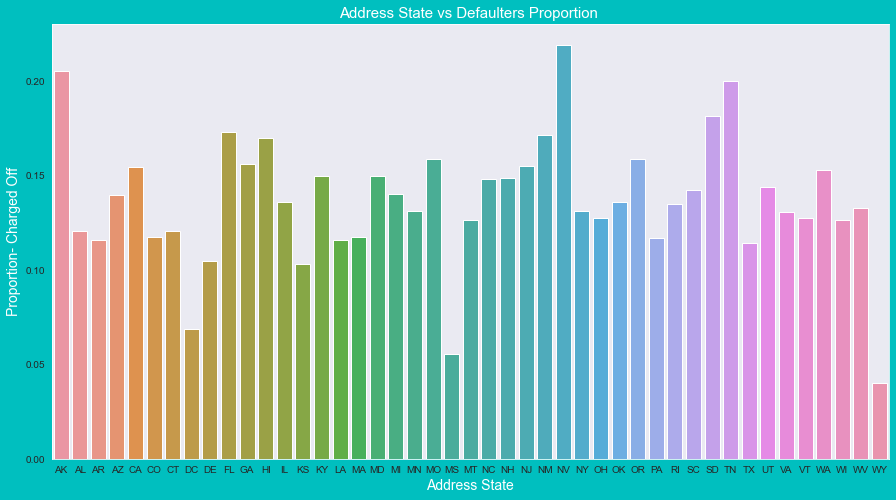

In [69]:
countPlot(dataset=loans,featureName="addr_state",xlabel="Address State")
plot_Charged_off_proportion('addr_state',xlabel='Address State')

**Observation:**
- The states with higher Charge Off rates are the ones which have lower number of loans. 
- Hence this variable is not significant and can be ignored for further analysis

### Ordered Variables:

### Feature: Loan Issue date 

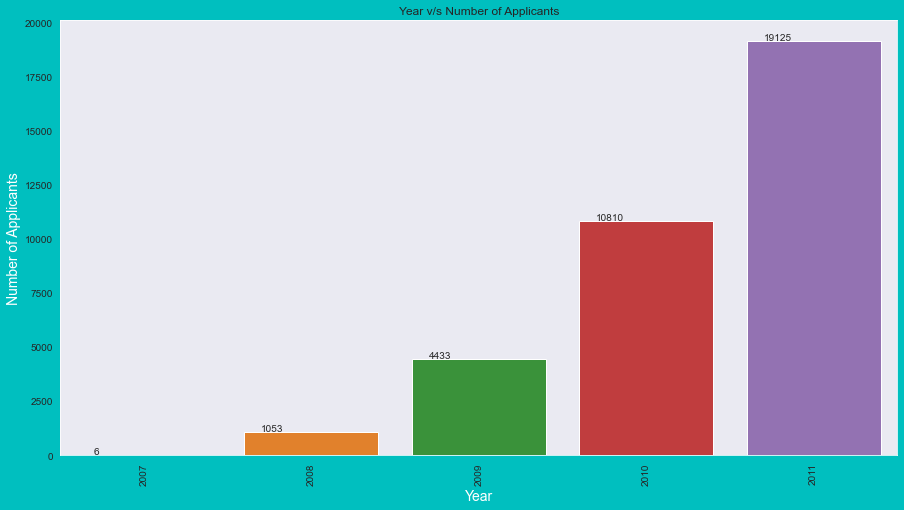

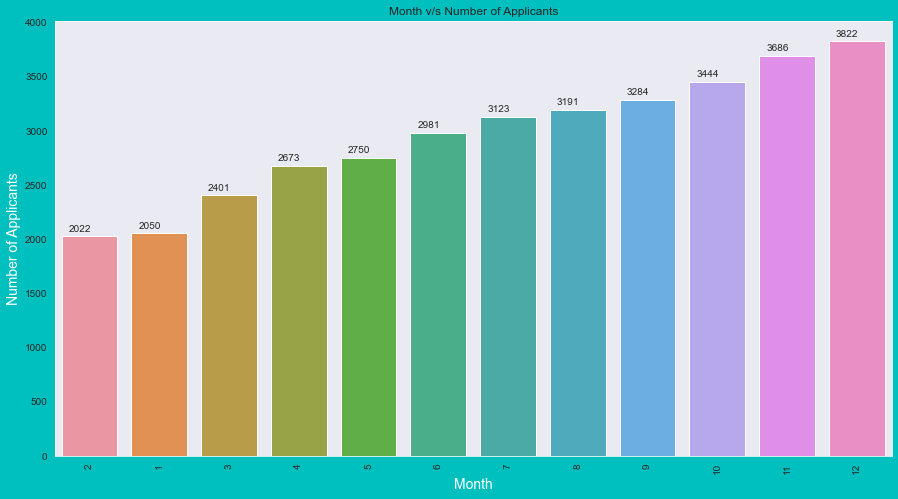

In [70]:
countPlot(dataset=loans,featureName="year",xlabel="Year")
countPlot(dataset=loans,featureName="month",xlabel="Month")

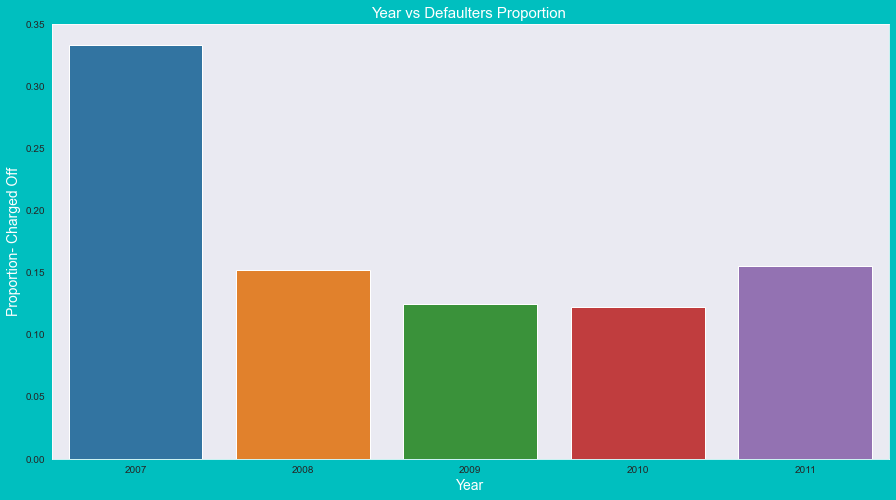

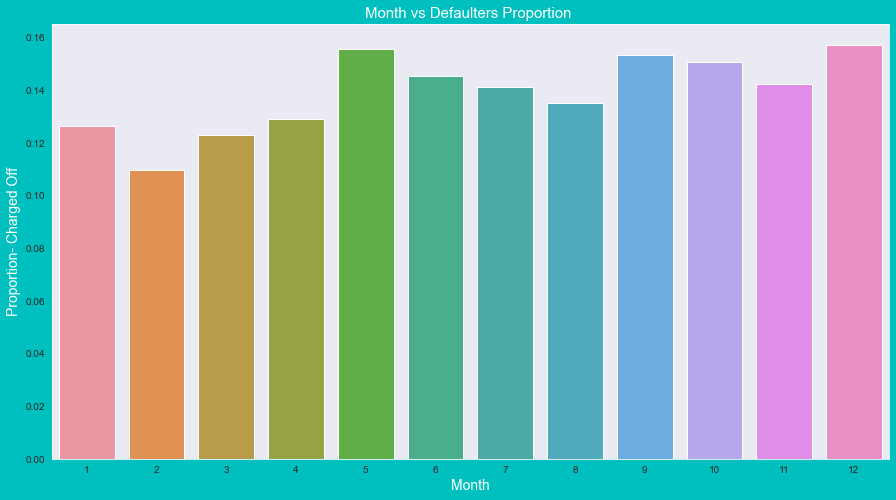

In [71]:
plot_Charged_off_proportion('year',xlabel='Year')
plot_Charged_off_proportion('month',xlabel='Month')

**Observation:**
- The Lending Club Almost doubled the Issuing of loans every Year.Most amount of loans are issued in 2011
- The loans issued are also increasing every month.Most of the loans are issued in the months of Oct , Nov ,Dec.
- The default rate is very high in 2007 but the number of applicants are very low and negligible.The year column does not have any impact on charged off rate.

### Feature: Grade

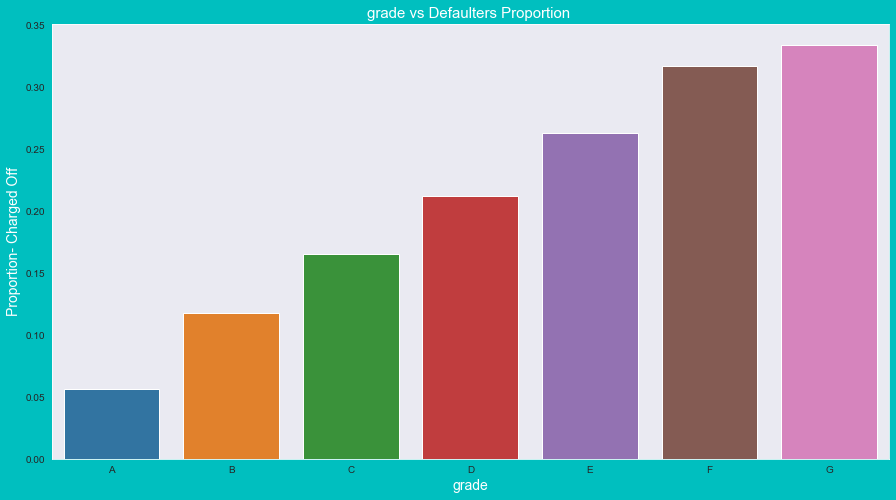

In [72]:
plot_Charged_off_proportion('grade',xlabel='grade')

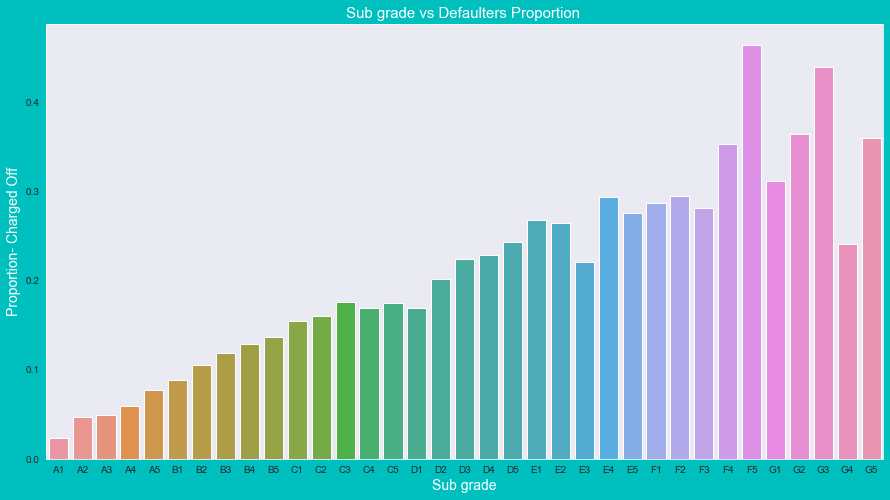

In [73]:
plot_Charged_off_proportion('sub_grade',xlabel='Sub grade')

**Observation:**
- Grade A and B loans are safe.
- Grade D, E, F, G loans are riskier.

### Feature:Employee length

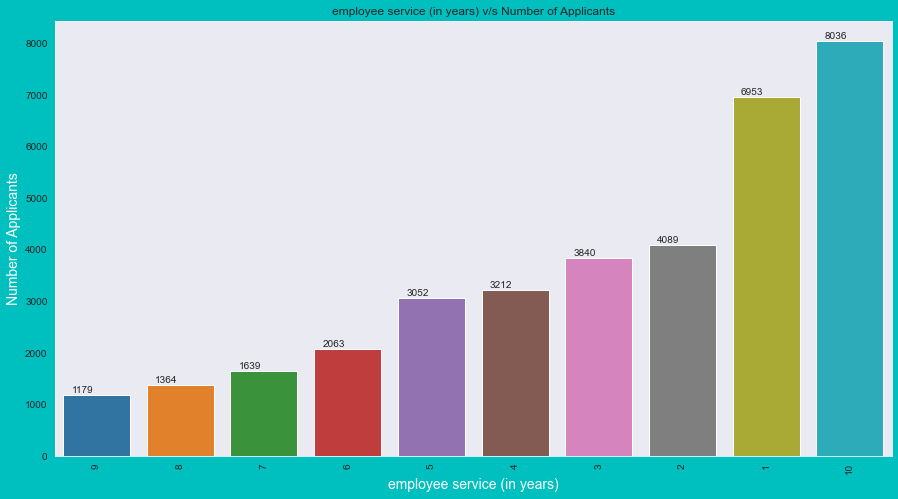

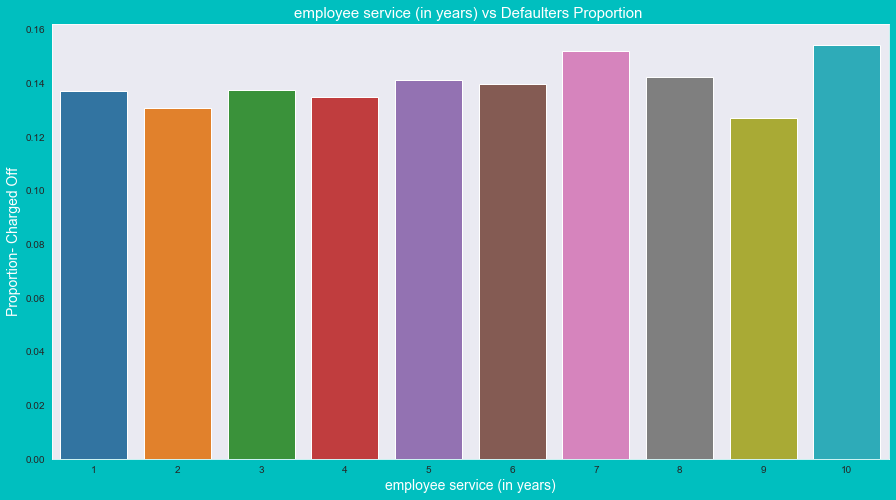

In [74]:
countPlot(dataset=loans,featureName="emp_length",xlabel="employee service (in years)")
plot_Charged_off_proportion('emp_length',xlabel='employee service (in years)')

**Observation:**
- Employee service does not have any impact on default rate.

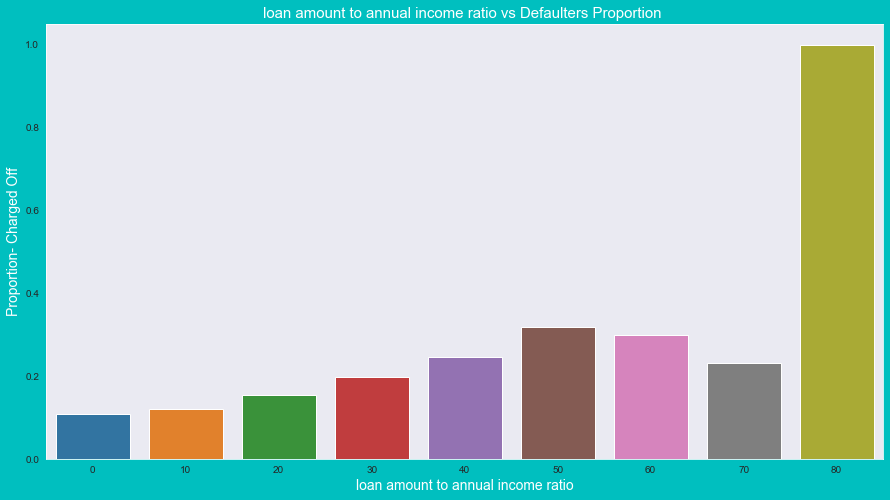

In [75]:
plot_Charged_off_proportion('ratio_bin',xlabel='loan amount to annual income ratio')

**Observation:**
- Charged off rate increases if the loan amount to annual income ratio increases.

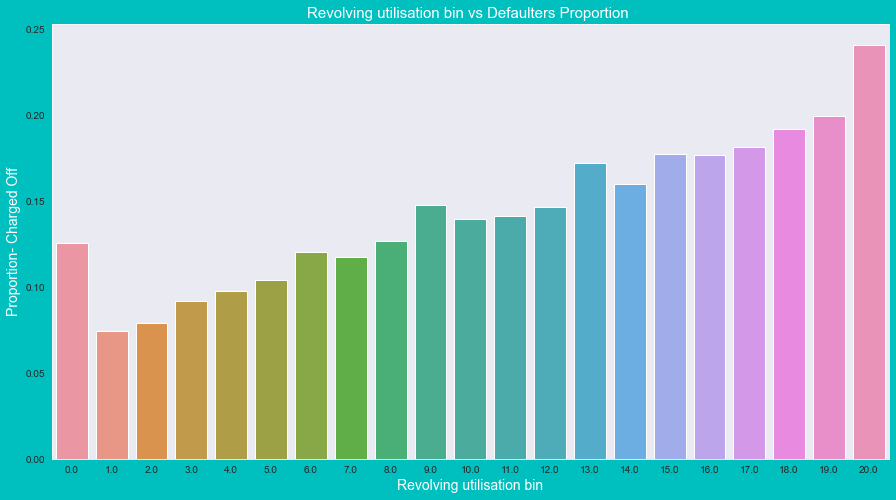

In [76]:
plot_Charged_off_proportion('revol_util_bin',xlabel='Revolving utilisation bin')

**Observation:**
- Charged off rate increases when revolving utilisation ratio increases.

## Important driver variables:

Based on the above analysis the following variables are considered for bivariate analysis.

1. __Purpose__
2. __Term__
3. __Interest rate__
4. __Annual Income__
5. __Grade__
6. __dti__
7. __revol_util__
8. __loan amount__

## *Bivariate  Analysis*

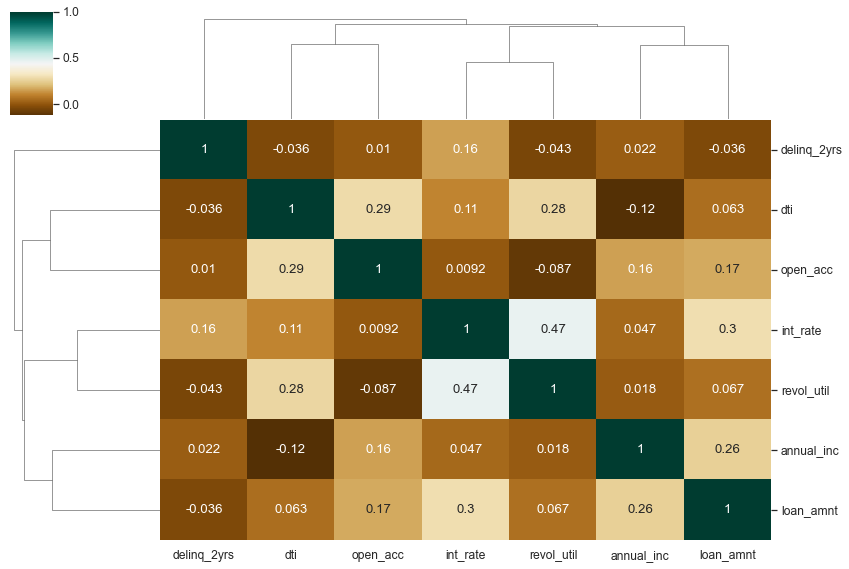

In [77]:
c=loans[['purpose','term','grade','int_rate','annual_inc','loan_amnt','revol_util','dti','open_acc','delinq_2yrs']]
loan_correlation = c.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

### Inferences from the above plot:

### 1. Positive correlation:

a.loan_amount and annual income.

b.interest rate and revol_util.

c.dti and open_acc.

### 2. Negative Correlation:

a.annual income and dti

b.delinq_2years and revol_util

## Scatter plot

We are going to plot scatter plots to show the above correlation

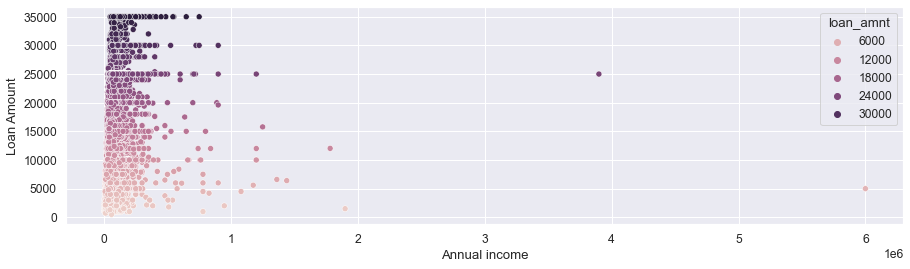

In [78]:
plot_scatterplot('annual_inc','loan_amnt','Annual income','Loan Amount')

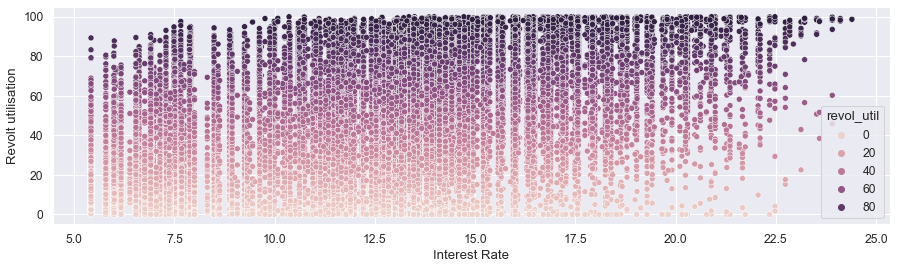

In [79]:
plot_scatterplot('int_rate','revol_util','Interest Rate','Revolt utilisation')

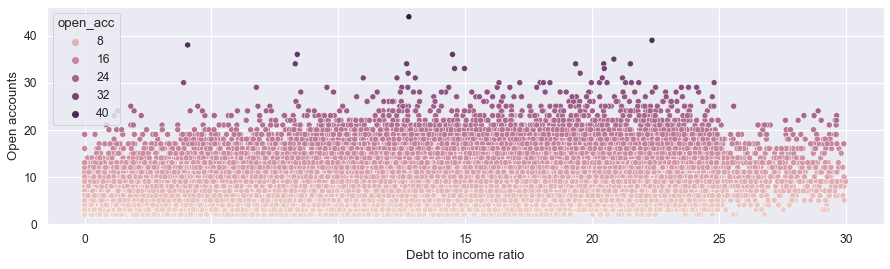

In [80]:
plot_scatterplot('dti','open_acc','Debt to income ratio','Open accounts')

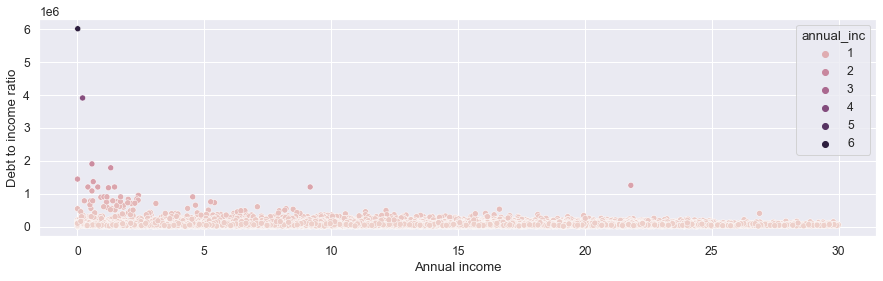

In [81]:
plot_scatterplot('dti','annual_inc','Annual income','Debt to income ratio')

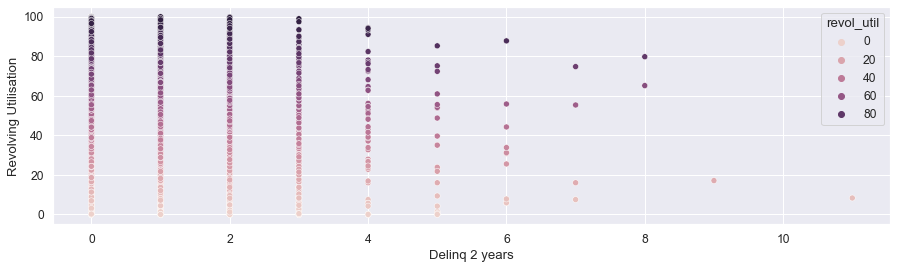

In [82]:
plot_scatterplot('delinq_2yrs','revol_util','Delinq 2 years','Revolving Utilisation')

## Purpose vs Loan amount

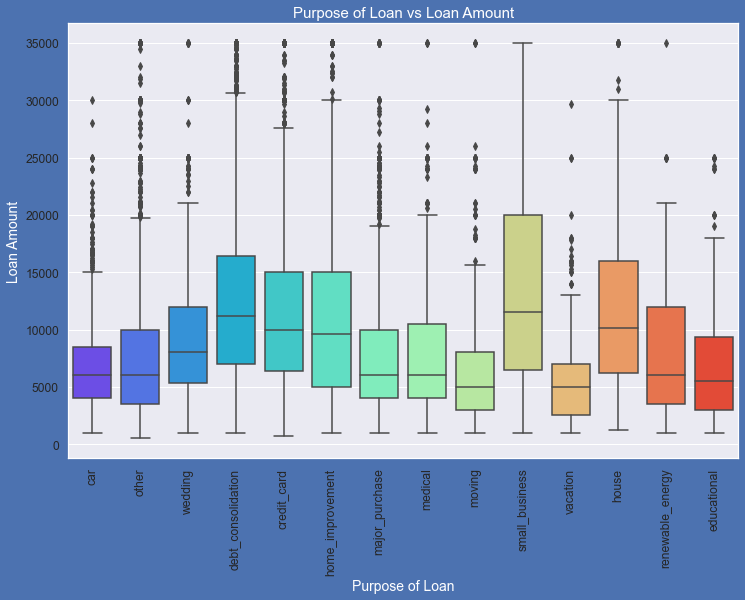

In [83]:
plot_boxplot('purpose','loan_amnt','Purpose of Loan','Loan Amount',dataset=loans)

**Observations**:
- Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
- Debt consolidation is second and Credit card comes 3rd.

## Interest rate vs Term:

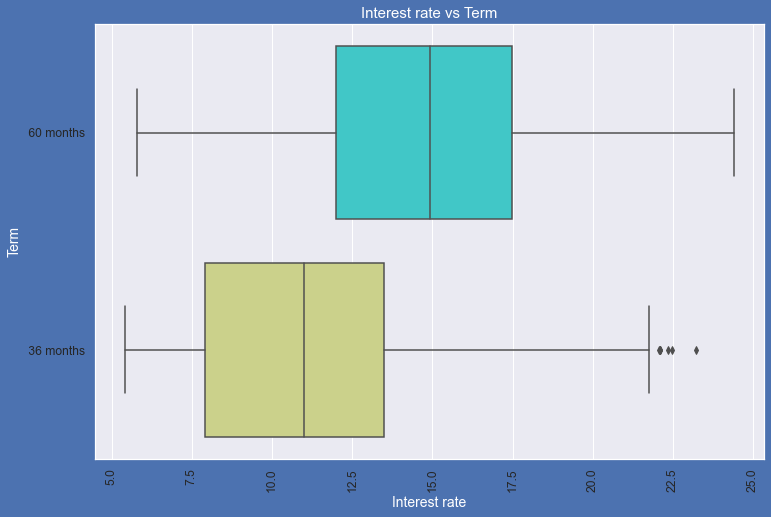

In [84]:
plot_boxplot('int_rate','term','Interest rate','Term',dataset=loans)

**Observations**:
- It is clear that avearge intrest rate is higher for 60 months loan term.
- Most of the loans issued for longer term had higher intrest rates for repayement.

## Purpose vs Interest Rate:

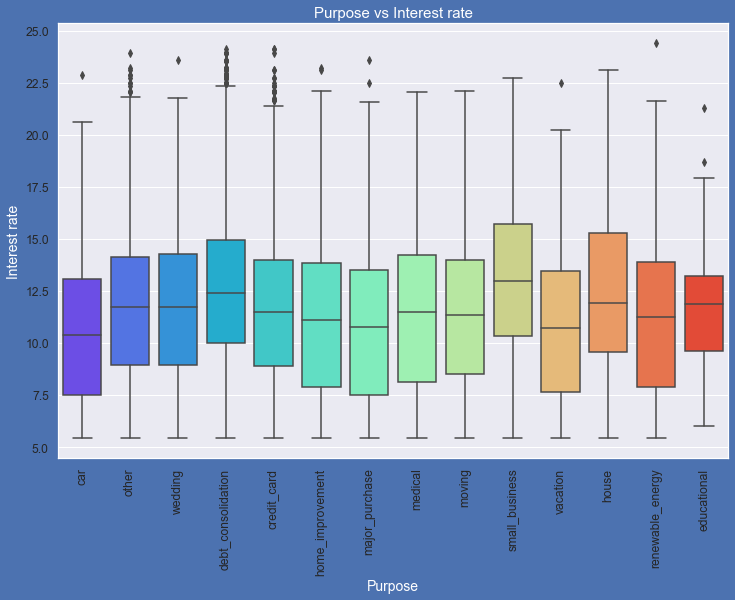

In [85]:
plot_boxplot('purpose','int_rate','Purpose','Interest rate',dataset=loans)

**Observations**:
- It is clear that avearge intrest rate is highest for small business purpose.
- Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
- Debt consolidation is 2nd where borrowers had to pay more interest rate.

## Grade vs Interest rate:

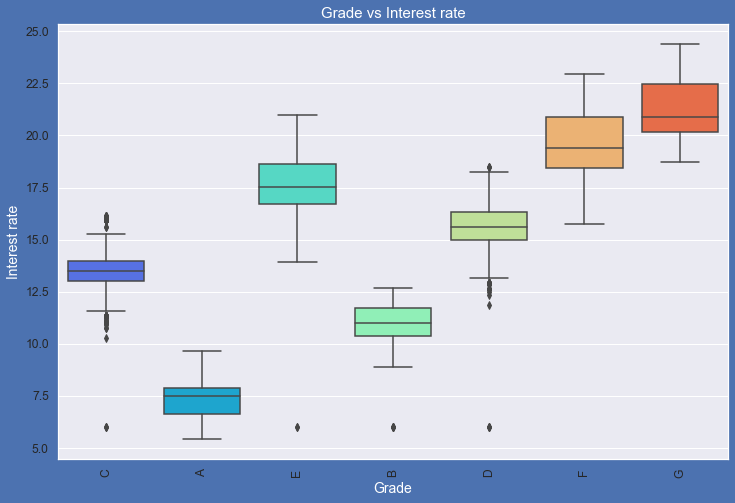

In [86]:
plot_boxplot('grade','int_rate','Grade','Interest rate',dataset=loans)

**Observations**:
- A-grade is a top letter grade for a lender to assign to a borrower.
- The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
- It is clear that intrest rate is increasing with grades moving from A to F.

## Loan amount vs Interest rate:

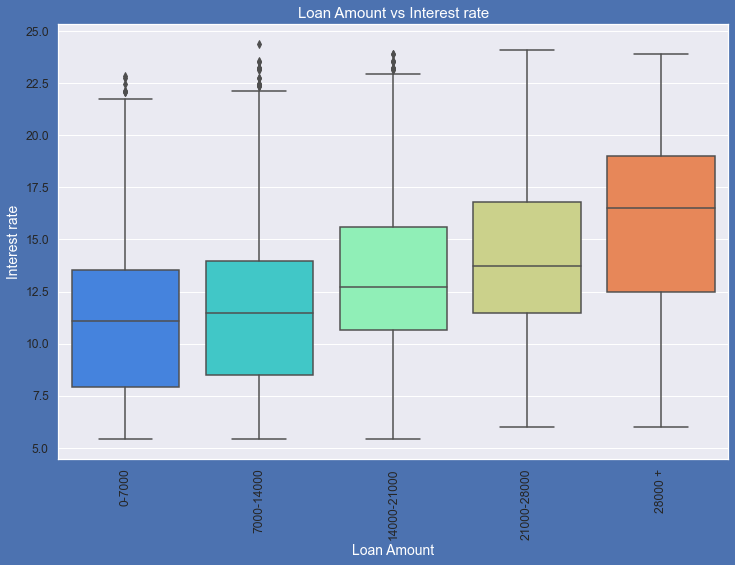

In [87]:
plot_boxplot('loan_amnt_cats','int_rate','Loan Amount','Interest rate',dataset=loans)

**Observations**:
- It is clear that intrest rate is increasing with loan amount increase.
- probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
  interest rate.

## dti vs Interest Rate:

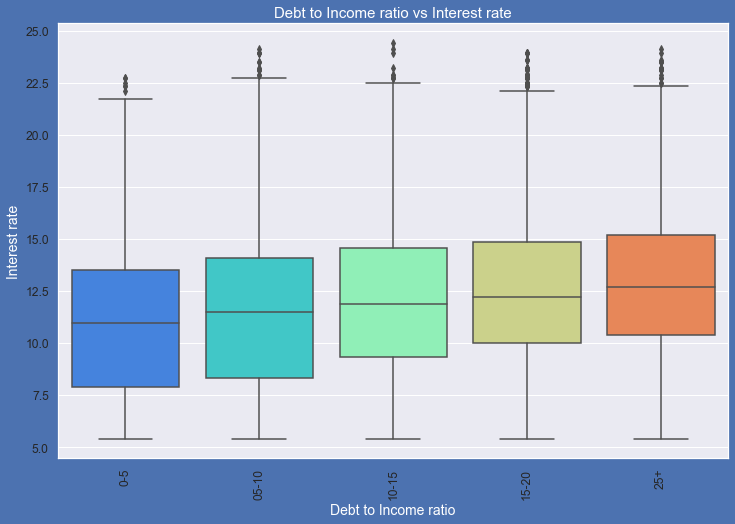

In [88]:
plot_boxplot('dti_cats','int_rate','Debt to Income ratio','Interest rate',dataset=loans)

**Observations**:
- If your DTI is low enough you may get a lower interest rate.
- Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

## Interest rate , term vs loan status

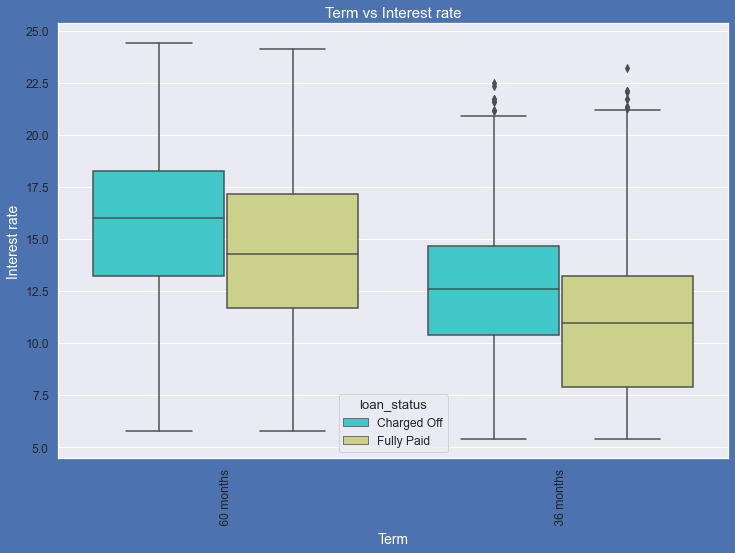

In [89]:
plot_boxplot_with_hue('term','int_rate','Term','Interest rate',hue='loan_status')

**Observation**: 
- From above plot we can see that defaulters are increasing when interest rate is increasing with respect to term

## Grade , Annual Income vs Loan Status

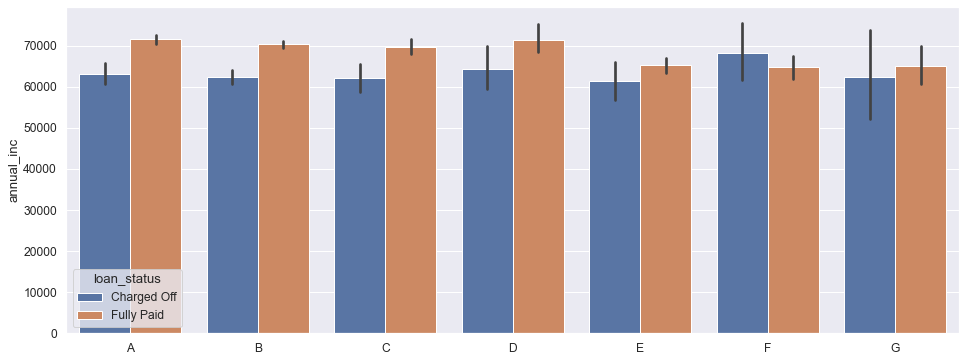

In [90]:
plt.figure(figsize=(16,6))
grades = sorted(loans.grade)
sns.barplot(x=grades,y=loans.annual_inc,hue=loans.loan_status)
plt.show()

**Observation**: 
- From above plot we can see that the borrowers with lower incomes deafult more.

### Loan amount ,Term Vs Loan Status

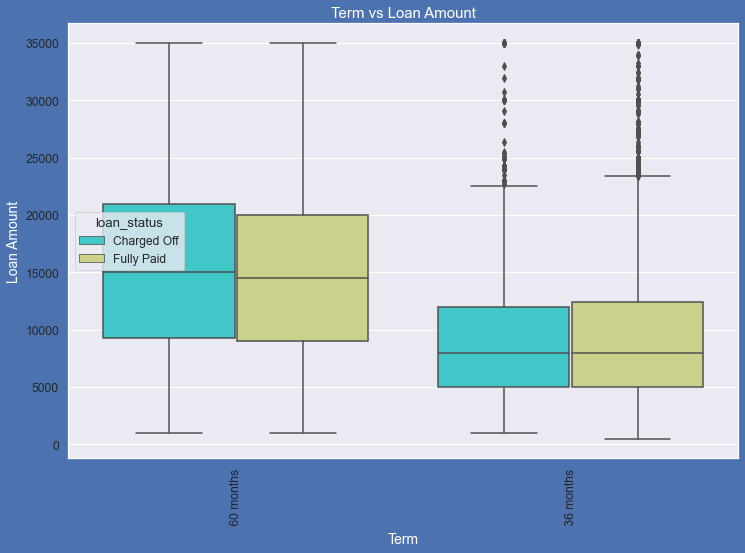

In [91]:
plot_boxplot_with_hue('term','loan_amnt','Term','Loan Amount',hue='loan_status')

**Observation**: 
- From above plot we can see that the borrowers who took higher loan amount and higher term ,defaulted more.

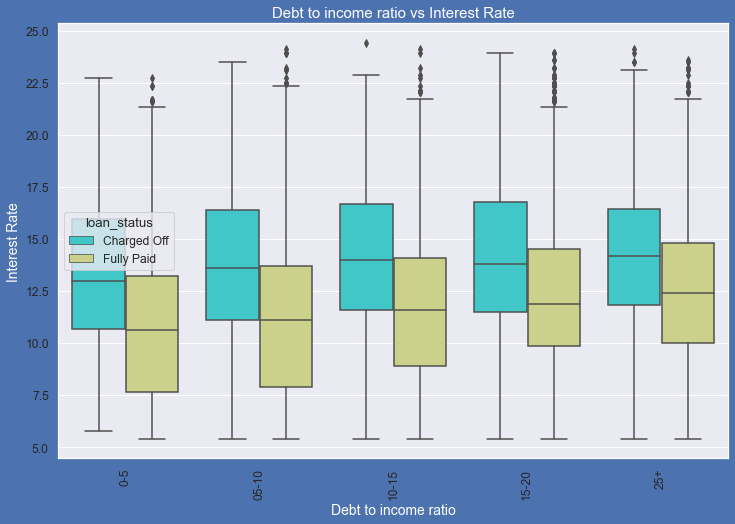

In [92]:
plot_boxplot_with_hue('dti_cats','int_rate','Debt to income ratio','Interest Rate',hue='loan_status')

## Conclusions:

Key driver features that increases or decreases the defaulters are :

1. __Term__:
Charged-off rate increases when term increases.
2. __Annual Income__:
Borrowers with lower annual income are likely to default. 
3. __Interest Rate__:
Charged off rate increases when interest rate increases.
4. __Purpose__:
Charged off rate increases when purpose is small business.
5. __dti__:
Charged off rate increases when dti increases.
6. __revol_util__:
Charged off rate increases when revolve util increases.

## Recommendations:

1. Reject - If the borrower has a bad credit history.
2. Reject - If the loan amount to income ratio is greater than 30% .
3. Reduce - If the purpose of loan is small business.
4. Reject - If revolving utilisation ratio is greater than 12.
5. Accept - By increasing the interest rate if dti ratio is greater than 15. 